# Wine and price analysis

In [1]:
# importo le librerie necessarie 
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib   
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(10, 5)})
sns.set(font_scale=1.5) 

### Pulizia e Modifica del DF 'W_red'

In [2]:
# leggo il mio file csv e lo inserico in una variabile denominata W_red
W_red = pd.read_csv('Wine Rating & Price/Red.csv')
W_red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [3]:
# Inserisco una nuova colonna che identifica la tipologia di vino 
W_red['Type of wine']= 'Red'

In [4]:
W_red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type of wine
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red


In [5]:
#Ordino le colonne del Dataframe 
W_red = W_red[['Type of wine', 'Name', 'Winery', 'Country', 'Region', 'Rating', 'NumberOfRatings', 'Year', 'Price']]

In [6]:
W_red.head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price
0,Red,Pomerol 2011,Château La Providence,France,Pomerol,4.2,100,2011,95.00
1,Red,Lirac 2017,Château Mont-Redon,France,Lirac,4.3,100,2017,15.50
2,Red,Erta e China Rosso di Toscana 2015,Renzo Masi,Italy,Toscana,3.9,100,2015,7.45
3,Red,Bardolino 2019,Cavalchina,Italy,Bardolino,3.5,100,2019,8.72
4,Red,Ried Scheibner Pinot Noir 2016,Markowitsch,Austria,Carnuntum,3.9,100,2016,29.15


<AxesSubplot:>

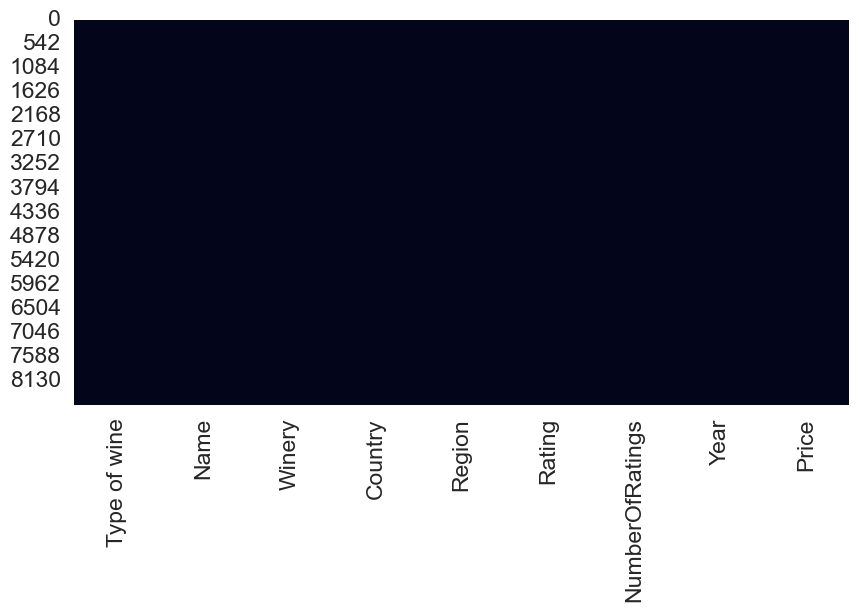

In [7]:
# ho usato un Heatmap per visualizzare tutti i record NaN
sns.heatmap(W_red.isna(), cbar=False)  

In [8]:
W_red.isna().sum()

Type of wine       0
Name               0
Winery             0
Country            0
Region             0
Rating             0
NumberOfRatings    0
Year               0
Price              0
dtype: int64

In [9]:
# con un .info , noto che Year è un Dtype di tipo Object e devo modificarlo
W_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     8666 non-null   object 
 1   Name             8666 non-null   object 
 2   Winery           8666 non-null   object 
 3   Country          8666 non-null   object 
 4   Region           8666 non-null   object 
 5   Rating           8666 non-null   float64
 6   NumberOfRatings  8666 non-null   int64  
 7   Year             8666 non-null   object 
 8   Price            8666 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 609.5+ KB


In [10]:
#Osservo se ci sono valori anomali prima di modificare Year 
print(W_red['Year'].unique())

['2011' '2017' '2015' '2019' '2016' '2014' '2013' '2018' '2012' '2010'
 '2007' '2005' '1999' '2002' '2008' '2006' '2009' 'N.V.' '2000' '2004'
 '2001' '1996' '1998' '1990' '1995' '2003' '1993' '1988' '1989' '1997'
 '1992' '1991']


In [11]:
# Rimuovo il 'N.V' sostituendolo con un 0, e modifico il Dtype come un 'int'
W_red["Year"] = W_red["Year"].fillna(0)
W_red['Year']= W_red['Year'].replace("\D+","0",regex=True).astype('int32')
print(W_red['Year'].unique())

[2011 2017 2015 2019 2016 2014 2013 2018 2012 2010 2007 2005 1999 2002
 2008 2006 2009    0 2000 2004 2001 1996 1998 1990 1995 2003 1993 1988
 1989 1997 1992 1991]


In [12]:
# Capire se posso sosituire i Valori della colonna Year da 0 a un valore mediano!!
condition  = (W_red['Year'] == 0 )
W_red.loc[condition, 'Year'] = W_red['Year'].median()
print(W_red['Year'].unique())

[2011 2017 2015 2019 2016 2014 2013 2018 2012 2010 2007 2005 1999 2002
 2008 2006 2009 2000 2004 2001 1996 1998 1990 1995 2003 1993 1988 1989
 1997 1992 1991]


In [13]:
W_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     8666 non-null   object 
 1   Name             8666 non-null   object 
 2   Winery           8666 non-null   object 
 3   Country          8666 non-null   object 
 4   Region           8666 non-null   object 
 5   Rating           8666 non-null   float64
 6   NumberOfRatings  8666 non-null   int64  
 7   Year             8666 non-null   int32  
 8   Price            8666 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 575.6+ KB


### Pulizia e Modifica del DF 'W_rose'

In [14]:
# leggo il mio file csv e lo inserico in una variabile denominata W_rose
W_rose = pd.read_csv('Wine Rating & Price/Rose.csv')
W_rose.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Mad Méditerranée Rosé 2019,France,Méditerranée,Château Camparnaud,4.0,25,10.11,2019
1,Redoma Rosé 2019,Portugal,Douro,Niepoort,3.9,25,12.81,2019
2,Fantini Cerasuolo d'Abruzzo 2019,Italy,Abruzzo,Farnese,3.6,25,5.60,2019
3,Mount Hermon Rosé 2017,Israel,Galilee,Hermon,3.4,25,12.14,2017
4,La Villa Rosé 2018,France,Languedoc,Château La Sauvageonne,4.6,25,68.95,2018


In [15]:
# Inserisco una nuova colonna che identifica la tipologia di vino 
W_rose['Type of wine']= 'Rose'

In [16]:
#Ordino le colonne del Dataframe 
W_rose = W_rose[['Type of wine', 'Name', 'Winery', 'Country', 'Region', 'Rating', 'NumberOfRatings', 'Year', 'Price']]

In [17]:
W_rose.head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price
0,Rose,Mad Méditerranée Rosé 2019,Château Camparnaud,France,Méditerranée,4.0,25,2019,10.11
1,Rose,Redoma Rosé 2019,Niepoort,Portugal,Douro,3.9,25,2019,12.81
2,Rose,Fantini Cerasuolo d'Abruzzo 2019,Farnese,Italy,Abruzzo,3.6,25,2019,5.60
3,Rose,Mount Hermon Rosé 2017,Hermon,Israel,Galilee,3.4,25,2017,12.14
4,Rose,La Villa Rosé 2018,Château La Sauvageonne,France,Languedoc,4.6,25,2018,68.95


<AxesSubplot:>

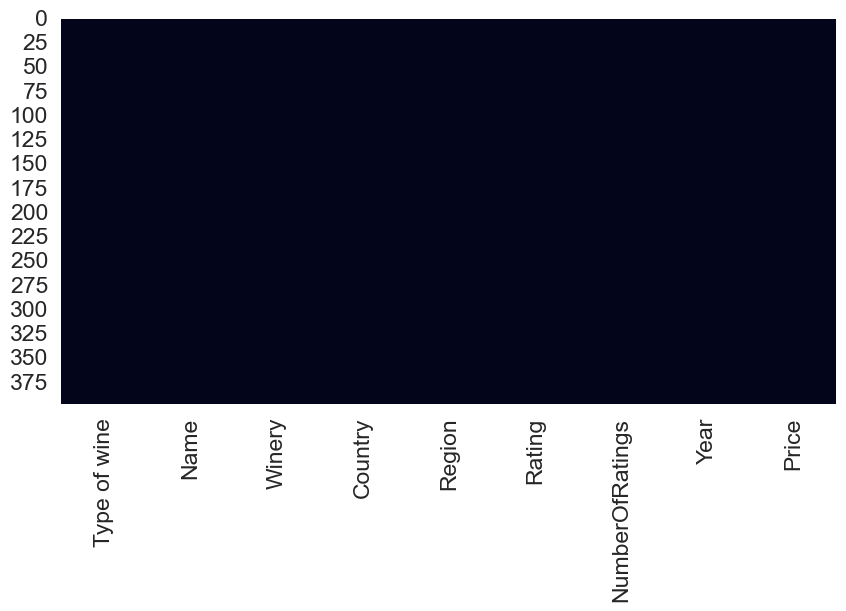

In [18]:
# ho usato un Heatmap per visualizzare tutti i record NaN
sns.heatmap(W_rose.isna(), cbar=False)  

In [19]:
W_rose.isna().sum()

Type of wine       0
Name               0
Winery             0
Country            0
Region             0
Rating             0
NumberOfRatings    0
Year               0
Price              0
dtype: int64

In [20]:
W_rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     397 non-null    object 
 1   Name             397 non-null    object 
 2   Winery           397 non-null    object 
 3   Country          397 non-null    object 
 4   Region           397 non-null    object 
 5   Rating           397 non-null    float64
 6   NumberOfRatings  397 non-null    int64  
 7   Year             397 non-null    object 
 8   Price            397 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 28.0+ KB


In [21]:
#Osservo se ci sono valori anomali prima di modificare Year 
print(W_rose['Year'].unique())

['2019' '2017' '2018' '2013' '2016' '2015' '2012' '2014' 'N.V.']


In [22]:
# Rimuovo il 'N.V' sostituendolo con un 0, e modifico il Dtype come un 'int'
W_rose["Year"] = W_rose["Year"].fillna(0)
W_rose['Year']= W_rose['Year'].replace("\D+","0",regex=True).astype('int32')
print(W_rose['Year'].unique())

[2019 2017 2018 2013 2016 2015 2012 2014    0]


In [23]:
# Capire se posso sosituire i Valori della colonna Year da 0 a un valore mediano!!
condition  = (W_rose['Year'] == 0 )
W_rose.loc[condition, 'Year'] = W_rose['Year'].median()
print(W_rose['Year'].unique())

[2019 2017 2018 2013 2016 2015 2012 2014]


In [24]:
W_rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     397 non-null    object 
 1   Name             397 non-null    object 
 2   Winery           397 non-null    object 
 3   Country          397 non-null    object 
 4   Region           397 non-null    object 
 5   Rating           397 non-null    float64
 6   NumberOfRatings  397 non-null    int64  
 7   Year             397 non-null    int32  
 8   Price            397 non-null    float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 26.5+ KB


### Pulizia e Modifica del DF 'W_white'

In [25]:
# leggo il mio file csv e lo inserico in una variabile denominata W_rose
W_white = pd.read_csv('Wine Rating & Price/White.csv')
W_white.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018


In [26]:
# Inserisco una nuova colonna che identifica la tipologia di vino 
W_white['Type of wine']= 'White'

In [27]:
#Ordino le colonne del Dataframe 
W_white = W_white[['Type of wine', 'Name', 'Winery', 'Country', 'Region', 'Rating', 'NumberOfRatings', 'Year', 'Price']]

In [28]:
W_white.head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price
0,White,Vermentino 2017,Famiglia Castellani,Italy,Toscana,3.8,25,2017,5.65
1,White,Ronco Broilo 2010,Conte d'Attimis Maniago,Italy,Colli Orientali del Friuli,4.3,25,2010,44.90
2,White,Weisser Schiefer s 2017,Weinbau Uwe Schiefer,Austria,Südburgenland,4.2,25,2017,33.25
3,White,Chardonnay 2018,Krämer - Straight,Germany,Rheinhessen,3.9,25,2018,8.99
4,White,Maganza Zibibbo 2018,Luna Gaia,Italy,Terre Siciliane,3.9,25,2018,8.60


<AxesSubplot:>

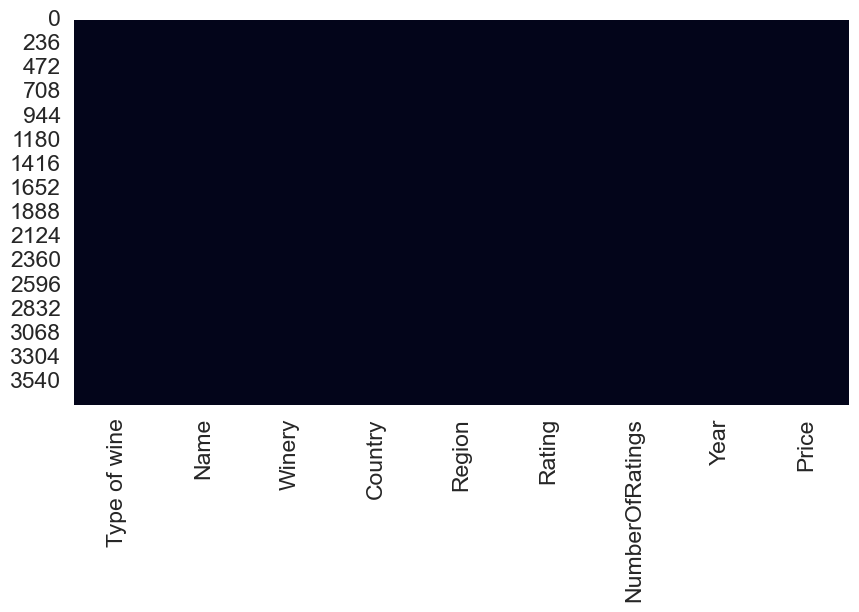

In [29]:
# ho usato un Heatmap per visualizzare tutti i record NaN
sns.heatmap(W_white.isna(), cbar=False)  

In [30]:
W_white.isna().sum()

Type of wine       0
Name               0
Winery             0
Country            0
Region             0
Rating             0
NumberOfRatings    0
Year               0
Price              0
dtype: int64

In [31]:
W_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     3764 non-null   object 
 1   Name             3764 non-null   object 
 2   Winery           3764 non-null   object 
 3   Country          3764 non-null   object 
 4   Region           3764 non-null   object 
 5   Rating           3764 non-null   float64
 6   NumberOfRatings  3764 non-null   int64  
 7   Year             3764 non-null   object 
 8   Price            3764 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 264.8+ KB


In [32]:
#Osservo se ci sono valori anomali prima di modificare Year 
print(W_white['Year'].unique())

['2017' '2010' '2018' '2019' '2016' '2015' '2014' '2013' '2012' '2007'
 '2011' '1999' '2006' '2003' '2004' '1998' '2020' '2005' '1993' 'N.V.'
 '2009' '2008']


In [33]:
# Rimuovo il 'N.V' sostituendolo con un 0, e modifico il Dtype come un 'int'
W_white["Year"] = W_white["Year"].fillna(0)
W_white['Year']= W_white['Year'].replace("\D+","0",regex=True).astype('int32')
print(W_white['Year'].unique())

[2017 2010 2018 2019 2016 2015 2014 2013 2012 2007 2011 1999 2006 2003
 2004 1998 2020 2005 1993    0 2009 2008]


In [34]:
# Capire se posso sosituire i Valori della colonna Year da 0 a un valore mediano!!
condition  = (W_white['Year'] == 0 )
W_white.loc[condition, 'Year'] = W_white['Year'].median()
print(W_white['Year'].unique())

[2017 2010 2018 2019 2016 2015 2014 2013 2012 2007 2011 1999 2006 2003
 2004 1998 2020 2005 1993 2009 2008]


In [35]:
W_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     3764 non-null   object 
 1   Name             3764 non-null   object 
 2   Winery           3764 non-null   object 
 3   Country          3764 non-null   object 
 4   Region           3764 non-null   object 
 5   Rating           3764 non-null   float64
 6   NumberOfRatings  3764 non-null   int64  
 7   Year             3764 non-null   int32  
 8   Price            3764 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 250.1+ KB


### Pulizia e Modifica del DF 'W_sparkling'

In [36]:
# leggo il mio file csv e lo inserico in una variabile denominata W_rose
W_sparkling = pd.read_csv('Wine Rating & Price/Sparkling.csv')
W_sparkling.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Crémant de Loire Brut 2017,France,Crémant de Loire,Langlois-Chateau,3.9,25,14.41,2017
1,Vicar's Choice Sauvignon Blanc Bubbles 2019,New Zealand,Marlborough,Saint Clair,4.2,25,11.90,2019
2,Crémant de Limoux Brut N.V.,France,Crémant de Limoux,Prima Perla,3.5,25,14.32,N.V.
3,Athesis Brut 2016,Italy,Südtirol - Alto Adige,Kettmeir,4.0,25,21.50,2016
4,Blanc de Blancs Réserve Brut Nature N.V.,Germany,Pfalz,Eymann,3.9,25,31.18,N.V.


In [37]:
# Inserisco una nuova colonna che identifica la tipologia di vino 
W_sparkling['Type of wine']= 'Sparkling'

In [38]:
#Ordino le colonne del Dataframe 
W_sparkling = W_sparkling[['Type of wine', 'Name', 'Winery', 'Country', 'Region', 'Rating', 'NumberOfRatings', 'Year', 'Price']]

<AxesSubplot:>

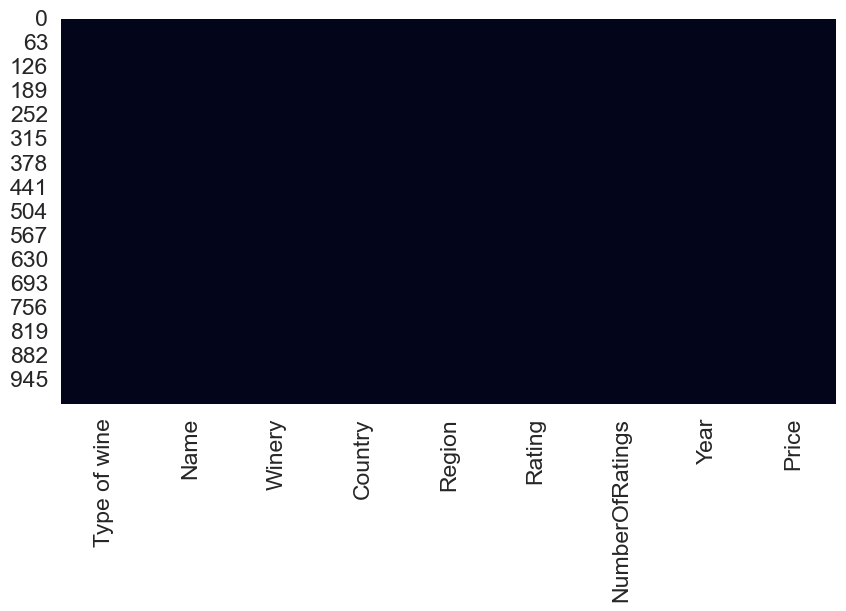

In [39]:
# ho usato un Heatmap per visualizzare tutti i record NaN
sns.heatmap(W_sparkling.isna(), cbar=False)  

In [40]:
W_sparkling.isna().sum()

Type of wine       0
Name               0
Winery             0
Country            0
Region             0
Rating             0
NumberOfRatings    0
Year               0
Price              0
dtype: int64

In [41]:
#Osservo se ci sono valori anomali prima di modificare Year 
print(W_sparkling['Year'].unique())

['2017' '2019' 'N.V.' '2016' '2015' '2012' '2007' '2011' '2008' '2010'
 '2013' '2018' '2014' '1961' '2005' '2006' '2009' '2004' '2003' '2002'
 '1999' '1996']


In [42]:
# Rimuovo il 'N.V' sostituendolo con un 0, e modifico il Dtype come un 'int'
W_sparkling["Year"] = W_sparkling["Year"].fillna(0)
W_sparkling['Year']= W_sparkling['Year'].replace("\D+","0",regex=True).astype('int32')
print(W_sparkling['Year'].unique())

[2017 2019    0 2016 2015 2012 2007 2011 2008 2010 2013 2018 2014 1961
 2005 2006 2009 2004 2003 2002 1999 1996]


In [43]:
# Capire se posso sosituire i Valori della colonna Year da 0 a un valore mediano!!
condition  = (W_sparkling['Year'] == 0)
W_sparkling.loc[condition, 'Year'] = W_sparkling['Year'].median()
print(W_sparkling['Year'].unique()) 

[2017 2019    0 2016 2015 2012 2007 2011 2008 2010 2013 2018 2014 1961
 2005 2006 2009 2004 2003 2002 1999 1996]


In [44]:
W_sparkling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     1007 non-null   object 
 1   Name             1007 non-null   object 
 2   Winery           1007 non-null   object 
 3   Country          1007 non-null   object 
 4   Region           1007 non-null   object 
 5   Rating           1007 non-null   float64
 6   NumberOfRatings  1007 non-null   int64  
 7   Year             1007 non-null   int32  
 8   Price            1007 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 67.0+ KB


### Unione dei DataFrame e analisi

In [45]:
dfs = [W_red, W_white, W_rose, W_sparkling]

# crea un dataframe vuoto per contenere il risultato
Wine_df = pd.DataFrame()

# uso un ciclo for per concatenare i dataframe uno alla volta
for df in dfs:
    Wine_df = pd.concat([Wine_df, df])

# stampa il risultato
Wine_df.head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price
0,Red,Pomerol 2011,Château La Providence,France,Pomerol,4.2,100,2011,95.00
1,Red,Lirac 2017,Château Mont-Redon,France,Lirac,4.3,100,2017,15.50
2,Red,Erta e China Rosso di Toscana 2015,Renzo Masi,Italy,Toscana,3.9,100,2015,7.45
3,Red,Bardolino 2019,Cavalchina,Italy,Bardolino,3.5,100,2019,8.72
4,Red,Ried Scheibner Pinot Noir 2016,Markowitsch,Austria,Carnuntum,3.9,100,2016,29.15


In [46]:
Wine_df.shape

(13834, 9)

In [47]:
Wine_df.Country.unique()

array(['France', 'Italy', 'Austria', 'New Zealand', 'Chile', 'Australia',
       'South Africa', 'Spain', 'United States', 'Portugal', 'Hungary',
       'Brazil', 'Argentina', 'Romania', 'Germany', 'Greece', 'Mexico',
       'Moldova', 'Switzerland', 'Slovenia', 'Israel', 'Georgia',
       'Lebanon', 'Uruguay', 'Turkey', 'Croatia', 'China', 'Slovakia',
       'Bulgaria', 'Canada', 'Luxembourg', 'Czech Republic',
       'United Kingdom'], dtype=object)

In [48]:
#Paese con il Rating più alto sul Vino
rating_wine_region= Wine_df.groupby('Country')['Rating'].sum().reset_index(drop=False)
rating_wine_region.sort_values(by='Rating', ascending=False).head(7)

,Country,Rating
16,Italy,15206.6
10,France,13513.2
27,Spain,5840.6
12,Germany,4753.5
26,South Africa,3216.7
31,United States,2060.8
2,Austria,1877.3


In [49]:
#Paese con il Price sul Vino più alto
price_wine_region= Wine_df.groupby('Country')['Price'].mean().reset_index(drop=False)
price_wine_region.sort_values(by='Price', ascending=False).head(7)

,Country,Price
30,United Kingdom,57.770000
10,France,55.539331
31,United States,43.719170
17,Lebanon,36.887500
1,Australia,36.781132
16,Italy,29.264825
28,Switzerland,28.949130


In [50]:
# Describe sul Rating 
Wine_df.groupby("Type of wine")["Rating"].describe().sort_values("50%",ascending=False).head().reset_index(drop=False)

,Type of wine,count,mean,std,min,25%,50%,75%,max
0,Red,8666.0,3.890342,0.308548,2.5,3.7,3.9,4.1,4.8
1,Sparkling,1007.0,3.880834,0.269194,3.2,3.7,3.8,4.1,4.7
2,White,3764.0,3.817906,0.266827,2.2,3.6,3.8,4.0,4.9
3,Rose,397.0,3.741310,0.273042,2.7,3.6,3.7,3.9,4.8


In [51]:
# Describe sul Price 
Wine_df.groupby("Type of wine")["Price"].describe().sort_values("50%",ascending=False).head().reset_index(drop=False)

,Type of wine,count,mean,std,min,25%,50%,75%,max
0,Sparkling,1007.0,34.803426,47.288413,3.15,11.90,19.45,39.0450,495.00
1,Red,8666.0,39.145065,84.936307,3.55,10.68,18.20,38.1425,3410.79
2,White,3764.0,20.620319,30.928415,3.74,9.26,13.15,20.8650,681.37
3,Rose,397.0,12.525743,16.037644,3.67,7.19,8.90,12.8500,249.00


In [52]:
#Vino con il Number of Rating più alto, quindi anche il piu venduto oltre che recensito
wine_n_rating= Wine_df.groupby(['Type of wine','Name','Country','Region','Price'])['NumberOfRatings'].sum().reset_index(drop=False)
wine_n_rating.sort_values(by='NumberOfRatings', ascending=False)

,Type of wine,Name,Country,Region,Price,NumberOfRatings
9172,Sparkling,Brut Champagne N.V.,France,Champagne,170.00,94287
9142,Sparkling,Brut (Carte Jaune) Champagne N.V.,France,Champagne,43.60,86839
9589,Sparkling,Impérial Brut Champagne N.V.,France,Champagne,40.61,76037
13543,White,Vinho Verde Branco N.V.,Portugal,Vinho Verde,4.35,62980
9204,Sparkling,Brut Premier Champagne N.V.,France,Champagne Premier Cru,36.48,40004
...,...,...,...,...,...,...
2151,Red,Costa Caoude Terrasses du Larzac 2013,France,Terrasses du Larzac,22.50,25
12801,White,Safari Pecorino 2017,Italy,Terre di Chieti,6.74,25
12072,White,Mâcon-Prissé 2014,France,Mâcon-Prissé,25.92,25
11445,White,Grechetto 2018,Italy,Umbria,8.90,25


In [53]:
#Qual'è il vino migliore per paese e regione con un Rating Alto
best_wine_region= Wine_df.groupby(['Type of wine','Name', 'Country','Region','NumberOfRatings'])['Rating'].mean().astype(int).reset_index(drop=False)
best_wine_region.sort_values(by='NumberOfRatings', ascending=False).head(7)                

,Type of wine,Name,Country,Region,NumberOfRatings,Rating
9189,Sparkling,Brut Champagne N.V.,France,Champagne,94287,4
9159,Sparkling,Brut (Carte Jaune) Champagne N.V.,France,Champagne,86839,4
9607,Sparkling,Impérial Brut Champagne N.V.,France,Champagne,76037,4
13562,White,Vinho Verde Branco N.V.,Portugal,Vinho Verde,62980,3
9221,Sparkling,Brut Premier Champagne N.V.,France,Champagne Premier Cru,40004,4
9955,Sparkling,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,37765,4
9162,Sparkling,Brut (Réserve) Champagne N.V.,France,Champagne,30090,4


In [54]:
#Qual'è il vino più caro per Region
best_wine_price= Wine_df.groupby(['Type of wine','Name', 'Country','Region','Rating'])['Price'].sum().astype(int).reset_index(drop=False)
best_wine_price.sort_values(by='Price', ascending=False).head(7)

,Type of wine,Name,Country,Region,Rating,Price
5498,Red,Pomerol 2012,France,Pomerol,4.7,3410
6551,Red,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,France,Saint-Émilion Grand Cru,4.5,1599
5067,Red,Pauillac (Premier Grand Cru Classé) 2010,France,Pauillac,4.4,1399
5062,Red,Pauillac (Premier Grand Cru Classé) 1992,France,Pauillac,4.5,1266
5149,Red,Pessac-Léognan (Premier Grand Cru Classé) 2010,France,Pessac-Léognan,4.6,1197
6552,Red,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,France,Saint-Émilion Grand Cru,4.6,1190
5059,Red,Pauillac (Premier Grand Cru Classé) 1989,France,Pauillac,4.6,1168


In [55]:
'''Valutazione Rating / Price
Da un valore che rappresenta il rapporto tra la qualità del vino (espressa dal rating) e il prezzo del vino. 
In altre parole, si cerca di capire quanto valore si ottiene per il prezzo che paghi per il vino.
Questo valore può essere utile per i consumatori di vino che cercano di bilanciare la qualità del vino con il suo prezzo,
in modo da ottenere il massimo valore per il loro budget. 
Inoltre, questo rapporto può aiutare i produttori di vino a capire come i loro prodotti sono valutati rispetto al prezzo che richiedono,
e se sono competitivi sul mercato in termini di valore.
Tuttavia, il rapporto rating / prezzo può fornire un'indicazione utile del valore complessivo di un vino rispetto ad altri 
vini nella stessa fascia di prezzo.
'''

"Valutazione Rating / Price\nDa un valore che rappresenta il rapporto tra la qualità del vino (espressa dal rating) e il prezzo del vino. \nIn altre parole, si cerca di capire quanto valore si ottiene per il prezzo che paghi per il vino.\nQuesto valore può essere utile per i consumatori di vino che cercano di bilanciare la qualità del vino con il suo prezzo,\nin modo da ottenere il massimo valore per il loro budget. \nInoltre, questo rapporto può aiutare i produttori di vino a capire come i loro prodotti sono valutati rispetto al prezzo che richiedono,\ne se sono competitivi sul mercato in termini di valore.\nÈ importante notare che il rating / prezzo non è l'unico fattore da considerare quando si valuta un vino\n- altri fattori come il gusto, l'aroma, la regione di produzione, l'annata e il tipo di uva possono avere \nun impatto significativo sulla qualità complessiva del vino.\nTuttavia, il rapporto rating / prezzo può fornire un'indicazione utile del valore complessivo di un vino ri

In [56]:
# Nuova colonna che calcola il rapporto tra Price e Rating
Wine_df["Rating Price Ratio"] = Wine_df["Rating"] / Wine_df["Price"]
Wine_df.head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price,Rating Price Ratio
0,Red,Pomerol 2011,Château La Providence,France,Pomerol,4.2,100,2011,95.00,0.044211
1,Red,Lirac 2017,Château Mont-Redon,France,Lirac,4.3,100,2017,15.50,0.277419
2,Red,Erta e China Rosso di Toscana 2015,Renzo Masi,Italy,Toscana,3.9,100,2015,7.45,0.523490
3,Red,Bardolino 2019,Cavalchina,Italy,Bardolino,3.5,100,2019,8.72,0.401376
4,Red,Ried Scheibner Pinot Noir 2016,Markowitsch,Austria,Carnuntum,3.9,100,2016,29.15,0.133791


In [59]:
#Trovare i massimi valori della colonna "rating_price_ratio".
Wine_df.sort_values(by='Rating Price Ratio', ascending=False).head(10)

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price,Rating Price Ratio
100,Sparkling,Frizzantino Dolce N.V.,Gualtieri,Italy,Emilia,4.2,43,0,3.15,1.333333
261,Sparkling,Lambrusco dell’Emilia Dolce N.V.,Gualtieri,Italy,Emilia,3.8,106,0,3.15,1.206349
379,Rose,Lambrusco Emilia Rosé N.V.,Riunite,Italy,Emilia,4.0,669,2018,3.67,1.089918
6408,Red,Nero d'Avola 2018,Monte Pietroso,Italy,Terre Siciliane,3.8,56,2018,3.79,1.002639
340,White,Bianco 2018,Monte Pietroso,Italy,Terre Siciliane,3.7,30,2018,3.79,0.976253
465,Sparkling,Frissé Rosé Frizzante N.V.,Félix Solís,Spain,La Mancha,3.8,223,0,3.90,0.974359
13,Rose,Rosé 2016,Mas Janeil,France,Pays d'Oc,3.6,26,2016,3.70,0.972973
1471,White,Trebbiano - Pinot Grigio 2019,Cielo e Terra,Italy,Puglia,4.0,59,2019,4.25,0.941176
7821,Red,Tempranillo Cariñena 2018,Marques de Villanueva,Spain,Cariñena,3.7,79,2018,3.99,0.927318
356,White,Bitácora Verdejo 2019,Cuatro Rayas,Spain,Rueda,3.9,31,2019,4.28,0.911215


In [82]:
# Le Tipologie di Vino con il rating - price migliore
wine_rating_price = Wine_df.groupby(['Type of wine','Price'])['Rating Price Ratio'].mean()
wine_rating_price.reset_index(drop=False).sort_values(by='Rating Price Ratio',ascending=False)


,Type of wine,Price,Rating Price Ratio
2757,Sparkling,3.15,1.269841
2491,Rose,3.67,1.089918
2,Red,3.79,1.002639
3393,White,3.79,0.976253
2758,Sparkling,3.90,0.974359
...,...,...,...
2486,Red,1197.90,0.003840
2487,Red,1266.25,0.003554
2488,Red,1399.00,0.003145
2489,Red,1599.95,0.002813


In [88]:
# Il mioglior Vino Rating - Price
sorted_data = Wine_df.sort_values(by='Rating Price Ratio', ascending=False)
best_wine = sorted_data.iloc[0]
best_wine

Type of wine                       Sparkling
Name                  Frizzantino Dolce N.V.
Winery                             Gualtieri
Country                                Italy
Region                                Emilia
Rating                                   4.2
NumberOfRatings                           43
Year                                       0
Price                                   3.15
Rating Price Ratio                  1.333333
Name: 100, dtype: object

### Rappresentazione Grafica dei Dati

In [60]:
sns.set_theme()
sns.set(rc={'figure.figsize':(12, 6)})
sns.set(font_scale=1.5) 
plt.style.use('seaborn')

[Text(0.5, 1.0, 'Paesi con il Rating più alto'),
 Text(0.5, 0, 'Paese'),
 Text(0, 0.5, 'Rating')]

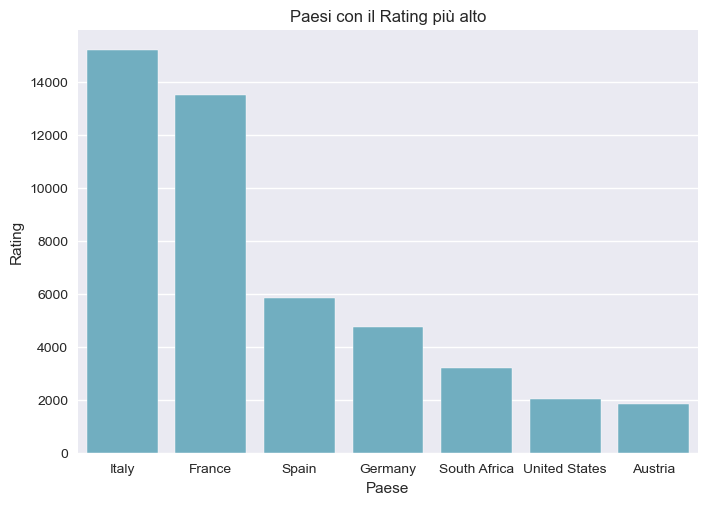

In [61]:
# barplot 
sns.barplot(x='Country', y='Rating', data=rating_wine_region.sort_values(by='Rating', ascending=False).head(7), errorbar=None, color='c').set(title='Paesi con il Rating più alto',
                                                                      xlabel='Paese', 
                                                                      ylabel='Rating')
                                                      

[Text(0.5, 1.0, 'Paesi con i Prezzi sul Vino più alto'),
 Text(0.5, 0, 'Paese'),
 Text(0, 0.5, 'Price')]

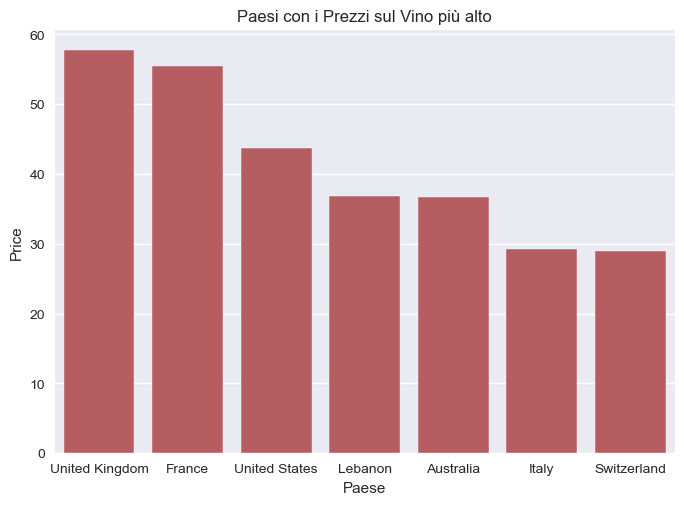

In [62]:
# barplot 
sns.barplot(x='Country', y='Price', data=price_wine_region.sort_values(by='Price', ascending=False).head(7), errorbar=None, color='r').set(title='Paesi con i Prezzi sul Vino più alto',
                                                                      xlabel='Paese', 
                                                                      ylabel='Price')
                                                      

Text(0.5, 1.0, 'Vino con numero di Recensioni più alto')

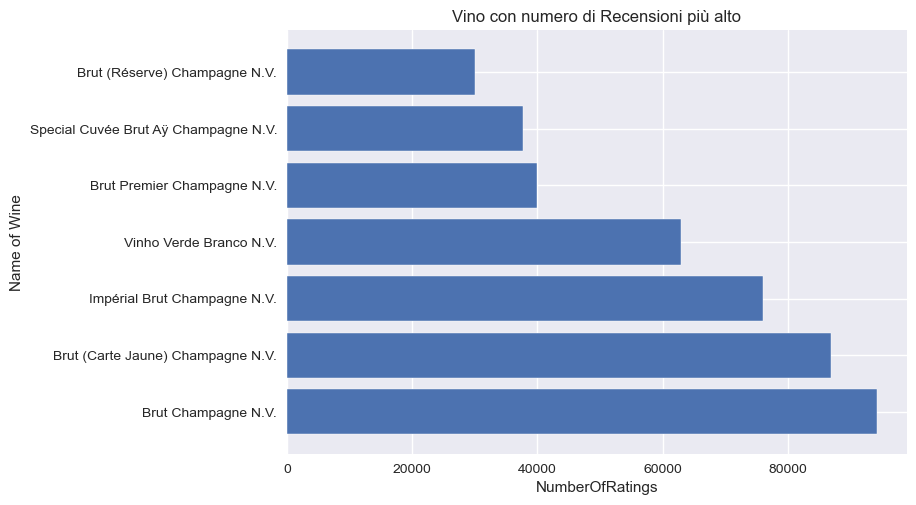

In [63]:
plt.barh('Name', 'NumberOfRatings', data=wine_n_rating.sort_values(by='NumberOfRatings', ascending=False).head(7))
plt.xlabel('NumberOfRatings')
plt.ylabel('Name of Wine')
plt.title("Vino con numero di Recensioni più alto") 

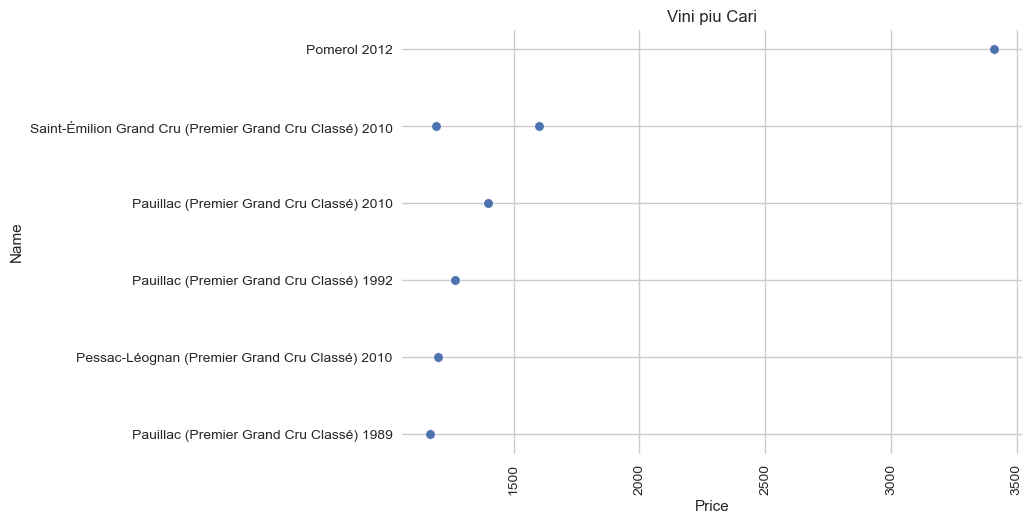

In [67]:
sns.scatterplot(x='Price', y='Name', data=best_wine_price.sort_values(by='Price', ascending=False).head(7))
plt.xticks(rotation=90)
plt.title("Vini piu Cari") 
plt.show() 